In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

random_seed = 42 # for reproductibility

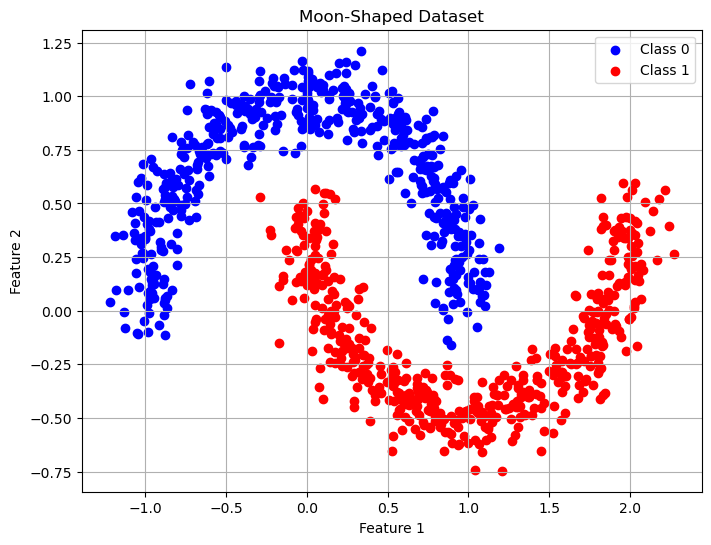

In [314]:
# Create a moon-shaped dataset with 100 samples
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# X contains the data points, and y contains their corresponding labels (0 or 1)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Class 1')

plt.title("Moon-Shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

plt.show()

In [315]:
#build indicatorfunction on half-closed cubes
def indicator(x, y, a1, b1, a2, b2):
    # a1,b1: edges of the first intervall
    # a2,b2: edges of the second intervall

    if a1<=x and x<b2 and a2<=y and y<b2:
        return 1
    else:
        return 0        

def histogram2d(data, n_edges=10):
    # we define bins as cubes of a regular grid in R^2
    # n_edges are the number of different edges per dimensions of the cubes

    x_min = min(data[:,0])
    x_max = max(data[:,0])
    y_min = min(data[:,1])
    y_max = max(data[:,1])
    n_samples = data.shape[0]

    #get length of steps in each dimension
    h1 = abs(x_max-x_min) / n_edges
    h2 = abs(y_max-y_min) / n_edges
    
    #build qubes
    edges = np.zeros((n_edges, n_edges, 4))
    for i in range(n_edges):
        for j in range(n_edges):
            edges[i,j,0] = x_min + i*h1     #lower x edge
            edges[i,j,1] = x_min + (i+1)*h1     #upper x edge
            edges[i,j,2] = y_min + j*h2     #lower y edge
            edges[i,j,3] = y_min + (j+1)*h2     #upper y edge

    
    #fill bins
    bins = np.zeros((n_edges,n_edges))
    for i in range(n_samples):
        for j in range(n_edges):
            for k in range(n_edges):     
                if edges[j,k,0]<=data[i,0] and data[i,0]<edges[j,k,1] and edges[j,k,2]<=data[i,1] and data[i,1]<edges[j,k,3]:
                    bins[j,k] += 1
                    break

    #build density
    def density(x,y):
        sum = 0
        for i in range(n_edges):
            for i in range(n_edges):
                sum += indicator(x, y, edges[i,j,0], edges[i,j,1], edges[i,j,2], edges[i,j,3]) * bins[i,j] / (n_samples*h1*h2)
        
        return sum    

    return density, bins, edges

#TODO: Sampling

[-1.21918752 -0.87017615 -0.74582054 -0.55001322]


0.0